<a href="https://colab.research.google.com/github/miglesky/Emotion-Detection/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import zipfile
import io

In [ ]:
import zipfile
import os

zip_file_path = '/content/archive.zip'  # Update with the name of your uploaded zip file
extraction_dir = '/content/FER2013DATASET'  # Update with the extraction directory

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)


BadZipFile: File is not a zip file

In [ ]:
for dirpath, dirname, filenames in os.walk('/content/FER2013DATASET'):
    print(f'There are {len(dirname)} directories and {len(filenames)} files in {dirpath}')

There are 2 directories and 0 files in /content/FER2013DATASET
There are 7 directories and 0 files in /content/FER2013DATASET/test
There are 0 directories and 111 files in /content/FER2013DATASET/test/disgust
There are 0 directories and 1024 files in /content/FER2013DATASET/test/fear
There are 0 directories and 1774 files in /content/FER2013DATASET/test/happy
There are 0 directories and 1247 files in /content/FER2013DATASET/test/sad
There are 0 directories and 958 files in /content/FER2013DATASET/test/angry
There are 0 directories and 1233 files in /content/FER2013DATASET/test/neutral
There are 0 directories and 831 files in /content/FER2013DATASET/test/surprise
There are 7 directories and 0 files in /content/FER2013DATASET/train
There are 0 directories and 436 files in /content/FER2013DATASET/train/disgust
There are 0 directories and 4097 files in /content/FER2013DATASET/train/fear
There are 0 directories and 7215 files in /content/FER2013DATASET/train/happy
There are 0 directories an

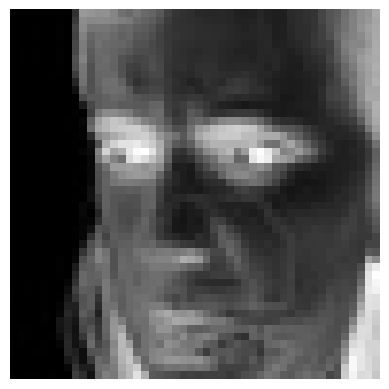

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Load the image
img = imread('/content/FER2013DATASET/train/disgust/Training_10598340.jpg')  # Update with the name of your uploaded image file

# Display the image
plt.imshow(img, 'binary')
plt.axis(False)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory='/content/FER2013DATASET/train',class_mode='binary')
test_data = test_datagen.flow_from_directory(directory='/content/FER2013DATASET/test',class_mode='binary')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
#preprocesinima atskirai(yra kagglre ir mes darem ten tik bsk pakeist)
#nereikia paddingo kaip
#butu gerai kad statistika vestu

# Nauja skiltis

In [ ]:
train_data = train_datagen.flow_from_directory(directory='/content/FER2013DATASET/train', class_mode='categorical', target_size=(48, 48), color_mode='grayscale')
test_data = test_datagen.flow_from_directory(directory='/content/FER2013DATASET/test', class_mode='categorical', target_size=(48, 48), color_mode='grayscale')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(7, activation='softmax'))



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 conv2d_25 (Conv2D)          (None, 18, 18, 128)       147584    
                                                      